In [1]:
from MFEA_lib.model import AbstractModel, SMP_MFEA, MFEA_base, SMP_DE, LSA21
from MFEA_lib.model.utils import *
from MFEA_lib.model.utils import TuningModel
import pandas as pd
import numpy as np
import scipy.io
from MFEA_lib.tasks.Benchmark.Funcs import * 
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *

In [2]:
from MFEA_lib.model import AbstractModel, SMP_MFEA, MFEA_base, SMP_DE, LSA21
from MFEA_lib.model.utils import *
from MFEA_lib.model.utils import TuningModel
import pandas as pd
import numpy as np
import scipy.io
from MFEA_lib.tasks.Benchmark.Funcs import * 
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *

ls_benchmark = []
ls_IndClass = []
ls_tasks = [3,6,9,10]
name_benchmark = [] 
for i in ls_tasks:
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(str(i))



smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= LSA21
)

smpModel.compile(
    # crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    crossover = SBX_LSA21(),
    # crossover = SBX_Crossover(nc=5),
    # mutation= GaussMutation(scale= 0.1),
    mutation = Polynomial_Mutation(pm=1, nm=7),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    search = LSHADE_LSA21(len_mem=30, p_ontop=0.11),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 4,
    lr = 0.1
)
a = smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/WCCI22_complex/SMP_v2/'
)


Time: 01m 19.01s  100 % [====================>]  Pop_size: 1.98E+02  ,  Cost: 6.29E+03  6.72E+03  ,  
[107017.  93076.]
END!
DONE!
Saved
Time: 01m 28.26s  100 % [====================>]  Pop_size: 1.98E+02  ,  Cost: 1.08E+04  5.10E+03  ,  
[107659.  92487.]
END!
DONE!
Saved
Time: 00m 54.63s  100 % [====================>]  Pop_size: 1.98E+02  ,  Cost: 7.36E+03  1.62E+03  ,  
[103099.  97653.]
END!
DONE!
Saved
Time: 01m 0.50s  100 % [====================>]  Pop_size: 1.98E+02  ,  Cost: 2.15E+03  7.02E+03  ,  
[106845.  93305.]
END!
DONE!
Saved


### Compare Benchmark

In [2]:
compare = CompareResultBenchmark(path_folder="./RESULTS/result/WCCI22_complex", ls_benchmark=[WCCI22_benchmark.get_complex_benchmark(i)[0] for i in range(1, 11)])

(0 : LSA_21)
(1 : LSA_COMPLEX)
(2 : SMP_COMPLEX_FINAL_CEC10)


In [13]:
compare.summarizing_compare_result(idx_main_algo=0, min_value=1e-6, idx_gener_compare=-1, total_generation=1000)

,Better,Equal,Worse
SMP_v2_tuned vs SMP_V2,1,0,3
SMP_v2_tuned vs LSA_COMPLEX,18,0,0
SMP_v2_tuned vs LSA_21,13,0,5
SMP_v2_tuned vs SMP_COMPLEX_FINAL_CEC10,18,0,0


In [4]:
compare.show_compare_detail(idx_main_algo=1, min_value=1e-6, round=7,idx_gener_compare=-100, total_generation=1000) 
# idx_gener_compare : vị trí thế hệ mà tại đó muốn so sánh các thuật toán với nhau
# total generation : số thế hệ của thuật toán. mặc định là 1000 

Benchmark:  1
         LSA_COMPLEX          LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1   612.7808236  (+)608.0086757             621.3871011
Tasks2   621.3179549  (+)607.8914176             621.3621195
Compare          0/2             2/2                     0/2

Benchmark:  2
         LSA_COMPLEX       LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1      (+)700.0  700.0025424             700.0010682
Tasks2   700.0073961  700.0032844                (+)700.0
Compare          1/2          0/2                     1/2

Benchmark:  3
             LSA_COMPLEX           LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1     189065.885624  (+)5613.4737617          973843.9168617
Tasks2   1004228.7825772  (+)7013.6265832          915792.5793199
Compare              0/2              2/2                     0/2

Benchmark:  4
          LSA_COMPLEX           LSA_21 SMP_COMPLEX_FINAL_CEC10
Tasks1   1300.6157909   (+)1300.302795            1300.4614545
Tasks2   1300.6448951  (+)1300.2629229            1300.4170891
Compare     

### Tuning Model

In [2]:
ls_benchmark = [] 
ls_IndClass = [] 
name_benchmarks = []
for id in range(1, 11): 
    # b, i = WCCI22_benchmark.get_50tasks_benchmark(id) 
    b, i = WCCI22_benchmark.get_complex_benchmark(id) 
    name_benchmarks.append("50tasks_id_" + str(id))
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

benchmark_weights = np.array([1,1,1,1,1,1,1,1,1.0,1.0])
benchmark_weights /= np.sum(benchmark_weights)
benchmark_weights = benchmark_weights.tolist()

model = TuningModel(
    model_name= SMP_MFEA, 
    list_parameter= [
        # ('mutation', {
        #     'pm': [1, 1.5, 0.75],
        #     'nm': [5,7],
        # }),

        # ('lr', [0.05, 0.1,0.15]),
        ('prob_search', [1, 0.75, 0.5]),
        # ('nb_inds_min', [100, 50, 25])
    ],
)
model.compile(
    ls_benchmark = ls_benchmark, 
    benchmark_weights = benchmark_weights, 
    name_benchmark = name_benchmarks,
    ls_IndClass = ls_IndClass,

    # tasks = None,
    # IndClass= None,
    # tasks = CEC17_benchmark.get_10tasks_benchmark(),
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    # crossover= SBX_Crossover(nc = 2),
    # mutation = GaussMutation(scale = 0.01),
    mutation = Polynomial_Mutation(nm=5, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= SHADE(len_mem= 6, p_ontop= 0.1), 
    attr_tasks = ['crossover', 'mutation', 'search']
)

fit, com, result = model.run(
    path="./RESULTS/tuning_50/",
    replace_folder=True,
    min_value = 1e-6,
    
    nb_generations= 5, 
    nb_inds_each_task= 100, 
    nb_inds_min= 30,
    lr = 0.1,  
    p_const_intra= 0,  
    prob_search = 1.0,
    nb_epochs_stop= 1000, 
    swap_po= False,
    evaluate_initial_skillFactor= True
)


 prob_search
1.0
Time: 00m 13.13s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.75E+02  6.75E+02  ,  
[0.5 0.5]
[509. 531.]
END!
DONE!
Saved
Time: 00m 0.51s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 1.45E+03  1.41E+03  ,  
[0.5 0.5]
[517. 523.]
END!
DONE!
Saved
Time: 00m 0.55s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 1.65E+08  3.21E+08  ,  
[0.5 0.5]
[509. 531.]
END!
DONE!
Saved
Time: 00m 0.47s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[545. 495.]
END!
DONE!
Saved
Time: 00m 0.42s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 4.09E+06  3.56E+06  ,  
[0.5 0.5]
[511. 529.]
END!
DONE!
Saved
Time: 00m 0.62s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 2.79E+08  1.79E+08  ,  
[0.5 0.5]
[509. 531.]
END!
DONE!
Saved
Time: 00m 0.59s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.09E+03  9.53E+03  ,  
[0.5 0.5]
[499. 541.]
END!
DONE!
Saved
T

In [ ]:
ls_benchmark = [] 
ls_IndClass = [] 
for id in range(1, 3): 
    b, i = CEC17_benchmark.get_2tasks_benchmark(id) 
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)

In [ ]:
model = TuningModel(
    model_name= SMP_MFEA, 
    list_parameter= [
        ('crossover', {
            'gamma': [0.4, 0.6]
        }), 
        ('lr', [0.04, 0.05]),
        ('crossover', {
            'alpha': [5, 7]
        }), 
    ],
)
model.compile(
    ls_benchmark = ls_benchmark, 
    benchmark_weights = (np.ones(shape= (3,)) / 3).tolist(), 
    name_benchmark = [str(i) for i in range(1,4)],
    ls_IndClass = ls_IndClass,

    # tasks = None,
    # IndClass= None,
    # tasks = CEC17_benchmark.get_10tasks_benchmark(),
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    # crossover= SBX_Crossover(nc = 2),
    mutation = GaussMutation(scale = 0.01),
    selection= ElitismSelection(random_percent= 0.),
    # search= SHADE(len_mem= 30, p_ontop= 0.1), 
    attr_tasks = ['crossover', 'mutation']
)

fit, com, result = model.run(
    replace_folder=True,
    min_value = 1e-6,
    
    nb_generations= 5, 
    nb_inds_each_task= 100, 
    nb_inds_min= 100,
    lr = 0.05,  
    p_const_intra= 0, 
    p_mutate= 0.1, 
    prob_search = 0.,
    nb_epochs_stop= 1000, 
    swap_po= False,
    evaluate_initial_skillFactor= True
)

### Show and compare result

In [ ]:
for id in range(1, 11): 
    SMP = loadModel("./RESULTS/__static__/GECCO20/SMP_NEWSBX_TUN_50/Gecco_id_"+ str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    SA = loadModel("./RESULTS/__static__/GECCO20/SA/SA_Benchmark_"+str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    LSA_21 = loadModel("./RESULTS/__static__/GECCO20/LSA_2021/LSA_2021_MTOMSO_Benchmark_"+str(id) + ".mso", GECCO20_benchmark_50tasks.get_items(id)[0])
    com = CompareModel([SMP, SA, LSA_21])
    print(com.detail_compare_result(min_value= 1e-6, round = 7))

In [ ]:
MFEA_model = loadModel('./RESULTS/MFEA_cec17.mso')
EBS_GA_model = loadModel('./RESULTS/EBS_GA_cec17.mso')
MaTDE_model = loadModel('./RESULTS/MaTDE_cec17.mso')
MaTGA_model = loadModel('./RESULTS/MaTGA_cec17.mso')
MTEA_AD_model = loadModel('./RESULTS/MTEA_AD_cec17.mso')
SA_model = loadModel('./RESULTS/SA_cec17.mso')
LSA_model = loadModel('./RESULTS/LSA_cec17.mso')
# SMP_NEWSBX = loadModel("./RESULTS/SMP_NEWSBX.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark())


In [ ]:
compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model],
    label= [...] * 7 ,
)
# compare.render(    
#     shape = (2, 5),
#     min_cost= 0,
#     step= 100,
#     yscale= 'log'
# )

In [ ]:
compare.detail_compare_result()

In [ ]:
compare.summarizing_compare_result(path=None , idx_main_algo= 2, nb_task= 2, ls_benchmark= [CEC17_benchmark.get_2tasks_benchmark(id) for id in range(1,10)])

In [ ]:
model = loadModel("./RESULTS/50tasks/SMP_NEWSBX/lan2_2s_newsbx_50task_1.mso")

In [ ]:
compare.summarizing_compare_result(path="./RESULTS/complex_2tasks/", idx_main_algo= 0, nb_task= 2, ls_benchmark= [WCCI22_benchmark.get_complex_benchmark(id)[0] for id in range(1,10)],min_value= 1e-6, combine= True)

In [ ]:
compare.summarizing_compare_result(path="./RESULTS/50tasks/", idx_main_algo= 7, nb_task= 50, ls_benchmark= [GECCO20_benchmark_50tasks.get_items(id) for id in range(1,11)],min_value= 1e-6, combine= False)

### Multi Time Model

In [ ]:
for id in range(4, 11): 
    tasks, IndClass= WCCI22_benchmark.get_50tasks_benchmark(id)

    smpModel = MultiTimeModel(model= SMP_MFEA)
    smpModel.compile(
        tasks= tasks,
        IndClass = IndClass,
        crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
        mutation= GaussMutation(scale= 0.1),
        # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
        selection= ElitismSelection(random_percent= 0.),
        attr_tasks = ['crossover', 'mutation'],
        
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
        lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
        nb_epochs_stop= 1500, 
        evaluate_initial_skillFactor= True
    )
    smpModel.run(
        nb_run= 1,
        save_path= './RESULTS/results/smpv2_50tasks_id_'+ str(id) + '.mso'
    )

In [ ]:
for id in range(1, 11): 
    tasks, IndClass= WCCI22_benchmark.get_50tasks_benchmark(id)

    smpModel = MultiTimeModel(model= SMP_MFEA)
    smpModel.compile(
        tasks= tasks,
        IndClass = IndClass,
        crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
        mutation= GaussMutation(scale= 0.1),
        # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
        selection= ElitismSelection(random_percent= 0.),
        attr_tasks = ['crossover', 'mutation'],
        
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
        lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
        nb_epochs_stop= 1500, 
        evaluate_initial_skillFactor= True
    )
    smpModel.run(
        nb_run= 5,
        save_path= './RESULTS/result/WCCI22_50tasks_id_'+ str(id) + '.mso'
    )

In [17]:
tasks, IndClass= CEC17_benchmark.get_10tasks_benchmark()

smpModel = MultiTimeModel(model= SMP_MFEA)
smpModel.compile(
    tasks= tasks,
    IndClass = IndClass,
    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    search = SHADE(),
    attr_tasks = ['crossover', 'mutation'],
    
)
smpModel.fit(
    nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.15, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
    nb_epochs_stop= 1500, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/MFEA_cec17_final.mso'
)

Time: 00m 4.68s  100 % [====================>]  Pop_size: 2.20E+02  ,  Cost: 5.22E+04  1.14E+05  1.29E+05  2.57E+01  1.36E+09  2.11E+01  6.44E+01  1.52E+04  3.33E+01  3.43E+04  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[1008.  982. 1072. 1028. 1034.  906. 1018.  984.  936. 1052.]
END!
DONE!
Cannot Saved


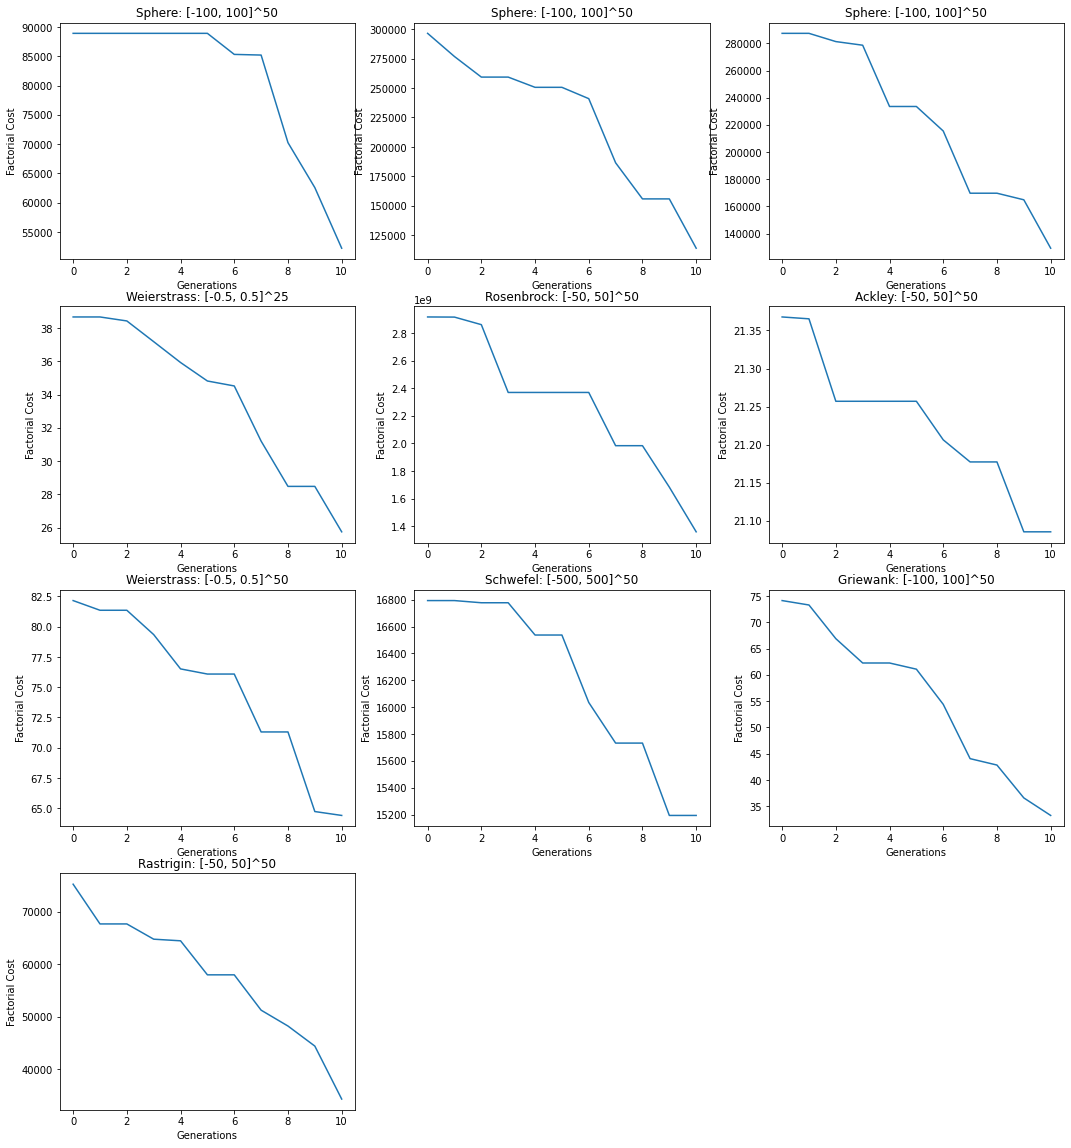

In [19]:
smpModel.render_history()

In [ ]:
smpModel.print_result(['history_cost'])

In [ ]:
ls_benchmark = [] 
ls_IndClass = [] 
for id in range(1, 10): 
    b, i = CEC17_benchmark.get_2tasks_benchmark(id) 
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)

smpModel = MultiBenchmark(
    ls_benchmark = ls_benchmark, 
    name_benchmark = [str(i) for i in range(1,4)],
    ls_IndClass = ls_IndClass,
    model= SMP_MFEA
    )

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation'],
    
)
smpModel.fit(
    nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 100,
    lr = 0.1, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
    nb_epochs_stop= 50, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 2,
    save_path= './RESULTS/result/smpMFEA_cec17.mso'
)

In [ ]:
smpModel.print_result(['history_cost'])

### SMP DE

In [2]:
tasks, IndClass= WCCI22_benchmark.get_complex_benchmark(3)

smpModel = MultiTimeModel(model= SMP_MFEA)
smpModel.compile(
    tasks= tasks,
    IndClass = IndClass,
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    # crossover = SBX_Crossover(nc=5),
    # mutation= GaussMutation(scale= 0.1),
    mutation = Polynomial_Mutation(pm=1, nm=7),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    search = L_SHADE(len_mem=6, p_ontop=0.1),
    attr_tasks = ['crossover', 'mutation', 'search'],
    
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 1.0,
    nb_epochs_stop= 1, 
    evaluate_initial_skillFactor= True, step_over= 5,
)
smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/smpMFEA_cec17.mso'
)

Time: 02m 10.14s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 2.32E+04  3.59E+04  ,  
[0.5 0.5]
[ 99751. 100257.]
END!
DONE!
Saved


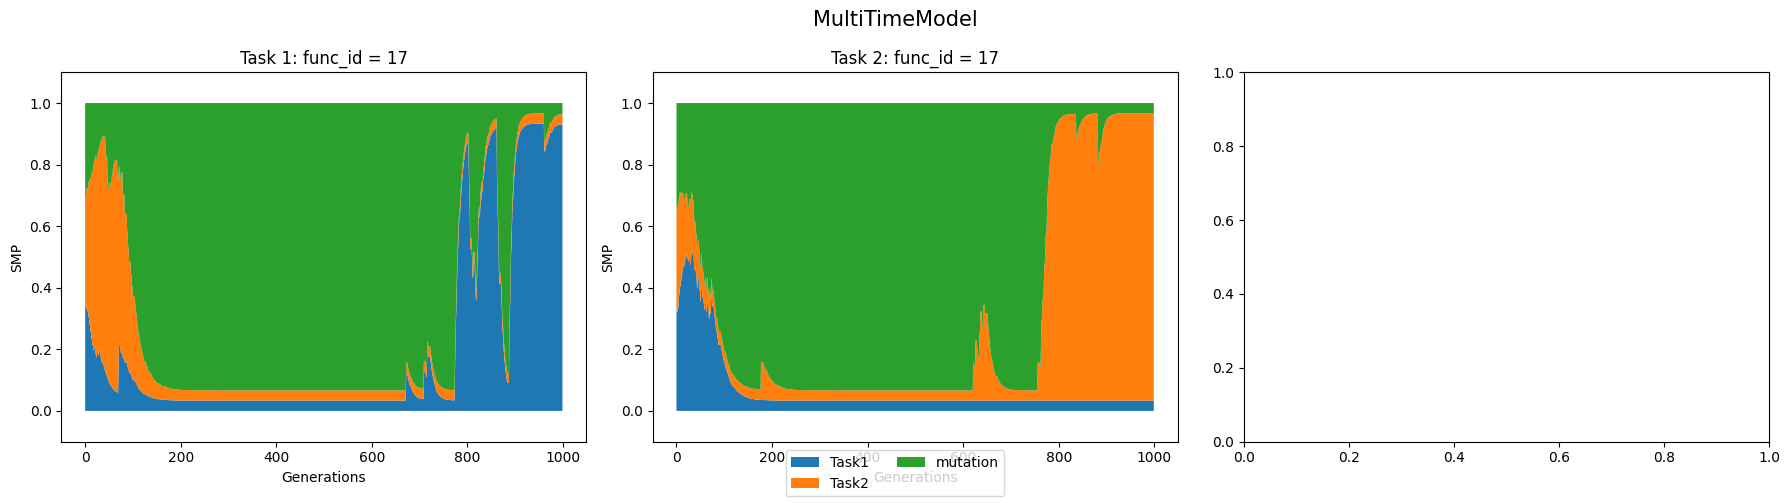

In [5]:
smpModel.render_smp()

In [ ]:
lsa_21 = loadModel("./RESULTS/__static__/GECCO20/LSA_2021/LSA_2021_MTOMSO_Benchmark_8.mso",WCCI22_benchmark.get_50tasks_benchmark(8)[0])
model = loadModel('./RESULTS/result/smpMFEA_cec17.mso', WCCI22_benchmark.get_50tasks_benchmark(8)[0])

compare = CompareModel([lsa_21, model])
compare.detail_compare_result(min_value=1e-6)

### SMP - LSHADE

In [5]:
ls_benchmark = []
ls_IndClass = []

for i in range(1, 2, 1):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)

name_benchmark = np.arange(len(ls_benchmark)) + 1

In [2]:
ls_benchmark = []
ls_IndClass = []

for i in range(1, 3, 1):
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)

name_benchmark = np.arange(len(ls_benchmark)) + 1


smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    # crossover = SBX_Crossover(nc=5),
    # mutation= GaussMutation(scale= 0.1),
    mutation = Polynomial_Mutation(pm=1, nm=7),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    search = L_SHADE(len_mem=6, p_ontop=0.1),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 5, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0.0, prob_search = 1.0,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,
    save_path= './RESULTS/result/WCCI22_complex/SMP_v2/'
)


Time: 00m 16.20s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.71E+02  6.73E+02  ,  
[0.5 0.5]
[525. 515.]
END!
DONE!
Saved
Time: 00m 0.59s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 1.32E+03  1.29E+03  ,  
[0.5 0.5]
[541. 499.]
END!
DONE!
Saved


In [15]:
model = loadModel("./RESULTS/result/WCCI22_complex/SMP_v2/1.mso", ls_tasks=WCCI22_benchmark.get_complex_benchmark(1)[0])

In [16]:
model.history_cost[-1]

array([2.82927641e+08, 2.07790438e+08])

In [ ]:
compare = CompareResultBenchmark(
    path_folder= "./RESULTS/result/WCCI22_complex",
    ls_benchmark= [WCCI22_benchmark.get_complex_benchmark(i)[0] for i in range(1, 10)]
)

In [ ]:
compare.summarizing_compare_result()

In [ ]:
compare.show_compare_detail()

### Draft